In [36]:
!pip install pycaret



In [37]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [38]:
from pycaret.datasets import get_data
dataset = get_data('bike')

instant    dteday  season  yr  mnth  ...  temp   atemp   hum  windspeed  cnt
0        1  1/1/2011       1   0     1  ...  0.24  0.2879  0.81        0.0   16
1        2  1/1/2011       1   0     1  ...  0.22  0.2727  0.80        0.0   40
2        3  1/1/2011       1   0     1  ...  0.22  0.2727  0.80        0.0   32
3        4  1/1/2011       1   0     1  ...  0.24  0.2879  0.75        0.0   13
4        5  1/1/2011       1   0     1  ...  0.24  0.2879  0.75        0.0    1

[5 rows x 15 columns]

In [39]:
dataset.drop(columns=['instant'], axis=1)

dteday  season  yr  mnth  hr  ...  temp   atemp   hum  windspeed  cnt
0        1/1/2011       1   0     1   0  ...  0.24  0.2879  0.81     0.0000   16
1        1/1/2011       1   0     1   1  ...  0.22  0.2727  0.80     0.0000   40
2        1/1/2011       1   0     1   2  ...  0.22  0.2727  0.80     0.0000   32
3        1/1/2011       1   0     1   3  ...  0.24  0.2879  0.75     0.0000   13
4        1/1/2011       1   0     1   4  ...  0.24  0.2879  0.75     0.0000    1
...           ...     ...  ..   ...  ..  ...   ...     ...   ...        ...  ...
17374  12/31/2012       1   1    12  19  ...  0.26  0.2576  0.60     0.1642  119
17375  12/31/2012       1   1    12  20  ...  0.26  0.2576  0.60     0.1642   89
17376  12/31/2012       1   1    12  21  ...  0.26  0.2576  0.60     0.1642   90
17377  12/31/2012       1   1    12  22  ...  0.26  0.2727  0.56     0.1343   61
17378  12/31/2012       1   1    12  23  ...  0.26  0.2727  0.65     0.1343   49

[17379 rows x 14 columns]

In [40]:
#check the shape of data
dataset.shape

(17379, 15)

In [41]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 15)
Unseen Data For Predictions: (1738, 15)


In [42]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt') 

Description             Value
0                               session_id               790
1                                   Target               cnt
2                            Original Data       (15641, 15)
3                           Missing Values             False
4                         Numeric Features                 6
5                     Categorical Features                 7
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (10948, 38)
10                    Transformed Test Set        (4693, 38)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              8c23
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [43]:
best = compare_models(exclude = ['ransac'])

Model           MAE           MSE  \
lightgbm  Light Gradient Boosting Machine  2.558010e+01  1.621114e+03   
et                  Extra Trees Regressor  2.563980e+01  1.729393e+03   
rf                Random Forest Regressor  2.586300e+01  1.789148e+03   
dt                Decision Tree Regressor  3.540280e+01  3.543328e+03   
gbr           Gradient Boosting Regressor  4.829810e+01  4.964578e+03   
ada                    AdaBoost Regressor  8.807270e+01  1.150665e+04   
lr                      Linear Regression  1.048710e+02  1.964652e+04   
ridge                    Ridge Regression  1.048968e+02  1.964910e+04   
br                         Bayesian Ridge  1.048981e+02  1.965211e+04   
lasso                    Lasso Regression  1.056007e+02  2.002764e+04   
knn                 K Neighbors Regressor  1.059504e+02  2.115268e+04   
omp           Orthogonal Matching Pursuit  1.105743e+02  2.183300e+04   
huber                     Huber Regressor  1.066583e+02  2.299995e+04   
en                            Elastic Net  1.135487e+02  2.338699e+04   
llar         Lasso Least Angle Regression  1.413981e+02  3.256782e+04   
dummy                     Dummy Regressor  1.413981e+02  3.256782e+04   
par          Passive Aggressive Regressor  2.095753e+02  7.877031e+04   
lar                Least Angle Regression  2.274880e+10  7.698152e+21   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
lightgbm  4.019830e+01  9.501000e-01  0.4145  4.219000e-01     0.170  
et        4.149440e+01  9.468000e-01  0.3450  3.219000e-01     4.397  
rf        4.219320e+01  9.448000e-01  0.3467  3.169000e-01     5.279  
dt        5.948020e+01  8.911000e-01  0.4527  3.845000e-01     0.108  
gbr       7.043540e+01  8.473000e-01  0.6750  9.291000e-01     1.320  
ada       1.071794e+02  6.460000e-01  1.0973  2.932600e+00     0.836  
lr        1.401410e+02  3.961000e-01  1.2020  3.299200e+00     0.036  
ridge     1.401515e+02  3.960000e-01  1.2033  3.305400e+00     0.031  
br        1.401626e+02  3.959000e-01  1.2021  3.301600e+00     0.049  
lasso     1.414940e+02  3.843000e-01  1.2028  3.318600e+00     0.090  
knn       1.454163e+02  3.495000e-01  1.2101  3.796400e+00     0.112  
omp       1.477241e+02  3.290000e-01  1.2267  3.413300e+00     0.032  
huber     1.516086e+02  2.931000e-01  1.1462  2.794500e+00     0.624  
en        1.528913e+02  2.812000e-01  1.2344  3.654800e+00     0.033  
llar      1.804312e+02 -9.000000e-04  1.5535  7.480600e+00     0.030  
dummy     1.804312e+02 -9.000000e-04  1.5535  7.480600e+00     0.024  
par       2.745100e+02 -1.439800e+00  1.8015  7.734500e+00     0.056  
lar       2.774920e+10 -2.266323e+17  8.6835  1.034314e+09     0.039

In [44]:
ada = create_model('ada')

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     82.0502  10271.1263  101.3466  0.6798  1.0961  2.8774
1     87.6263  11341.1045  106.4946  0.6680  1.0582  2.9201
2     80.5906  10183.4079  100.9129  0.7002  1.0197  2.3748
3     87.5253  11103.9626  105.3753  0.6373  1.0515  2.5552
4     88.7177  11889.9530  109.0411  0.6336  1.1469  3.2308
5     85.0772  10889.6230  104.3534  0.6677  1.0272  2.3814
6     94.1007  12605.1538  112.2727  0.6255  1.1640  3.3093
7     89.7779  11696.7066  108.1513  0.6145  1.1546  3.4626
8     89.4952  11649.3516  107.9322  0.6351  1.1536  3.2662
9     95.7656  13436.1342  115.9143  0.5982  1.1010  2.9480
Mean  88.0727  11506.6523  107.1794  0.6460  1.0973  2.9326
SD     4.5010    947.6708    4.3843  0.0301  0.0529  0.3720

In [45]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=790)


In [46]:
lightgbm = create_model('lightgbm')

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     25.9084  1693.9795  41.1580  0.9472  0.4565  0.5091
1     26.3823  1743.5054  41.7553  0.9490  0.3986  0.4116
2     24.6420  1599.6467  39.9956  0.9529  0.4122  0.4291
3     24.3345  1400.5197  37.4235  0.9542  0.3800  0.3511
4     23.6634  1365.1872  36.9484  0.9579  0.3911  0.4133
5     26.2248  1577.9566  39.7235  0.9518  0.4030  0.3939
6     25.6290  1555.2099  39.4362  0.9538  0.4371  0.4143
7     26.6443  1787.2097  42.2754  0.9411  0.4541  0.5068
8     26.6579  2015.2417  44.8914  0.9369  0.4154  0.3857
9     25.7145  1472.6869  38.3756  0.9560  0.3974  0.4039
Mean  25.5801  1621.1143  40.1983  0.9501  0.4145  0.4219
SD     0.9791   186.0299   2.2829  0.0063  0.0250  0.0475

In [47]:
dt = create_model('dt')

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     34.0986  3212.6612  56.6803  0.8998  0.4589  0.4318
1     35.6977  3750.5525  61.2418  0.8902  0.4506  0.3913
2     34.8457  3435.4155  58.6124  0.8989  0.4672  0.4107
3     35.2137  3161.2557  56.2250  0.8967  0.4675  0.3805
4     34.2311  3146.3936  56.0927  0.9030  0.4610  0.3905
5     36.4374  3688.0575  60.7294  0.8874  0.4462  0.3791
6     35.9973  3697.8548  60.8100  0.8901  0.4607  0.3928
7     35.3525  3688.8868  60.7362  0.8784  0.4369  0.3568
8     36.1901  3639.4497  60.3279  0.8860  0.4427  0.3454
9     35.9634  4012.7495  63.3463  0.8800  0.4351  0.3662
Mean  35.4028  3543.3277  59.4802  0.8911  0.4527  0.3845
SD     0.7660   276.2376   2.3310  0.0080  0.0114  0.0240

In [48]:
tuned_ada = tune_model(ada)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     77.7914  10020.8789  100.1043  0.6876  0.9554  2.0000
1     81.3450  11138.2411  105.5379  0.6739  0.8514  1.6490
2     74.4140   9359.7108   96.7456  0.7245  0.8996  1.7956
3     74.5458   9460.2179   97.2637  0.6910  0.8415  1.5425
4     75.4183  10157.6890  100.7854  0.6870  0.8763  1.7132
5     78.2093  10277.0280  101.3757  0.6863  0.8879  1.7116
6     79.4871  10499.4411  102.4668  0.6881  0.9119  1.7724
7     75.8257   9498.9441   97.4625  0.6869  0.9036  1.8252
8     76.9326  10192.3432  100.9571  0.6808  0.8197  1.3817
9     81.5488  11067.8081  105.2037  0.6690  0.8844  1.7454
Mean  77.5518  10167.2302  100.7903  0.6875  0.8832  1.7137
SD     2.4778    591.3563    2.9247  0.0140  0.0368  0.1579

In [49]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=250, random_state=790)


In [50]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [51]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     23.9917  1393.3806  37.3280  0.9566  0.4496  0.3850
1     24.5895  1460.8937  38.2216  0.9572  0.4112  0.3888
2     21.9038  1255.4386  35.4322  0.9630  0.4109  0.3816
3     23.4975  1321.4978  36.3524  0.9568  0.3862  0.3406
4     22.0983  1149.9631  33.9111  0.9646  0.3786  0.3629
5     23.3662  1266.7618  35.5916  0.9613  0.3882  0.3326
6     23.0883  1291.1759  35.9329  0.9616  0.3738  0.3569
7     23.9006  1498.1536  38.7060  0.9506  0.4042  0.3728
8     25.0966  1738.1498  41.6911  0.9456  0.3937  0.3336
9     23.3446  1308.7830  36.1771  0.9609  0.3873  0.3533
Mean  23.4877  1368.4198  36.9344  0.9578  0.3984  0.3608
SD     0.9413   156.6055   2.0662  0.0056  0.0209  0.0199

In [52]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
              random_state=790, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [53]:
tuned_dt = tune_model(dt)

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     31.9432  2875.3813  53.6226  0.9104  0.4255  0.4232
1     34.4252  3098.0148  55.6598  0.9093  0.3959  0.3622
2     33.0227  2993.9203  54.7167  0.9119  0.4143  0.3776
3     32.5338  2792.0020  52.8394  0.9088  0.4175  0.3937
4     30.4964  2551.3137  50.5105  0.9214  0.3940  0.3554
5     35.2414  2988.3111  54.6654  0.9088  0.4387  0.4125
6     32.7301  2757.4335  52.5113  0.9181  0.4064  0.3573
7     33.2087  3189.5453  56.4761  0.8949  0.4006  0.3537
8     34.1867  3182.0573  56.4097  0.9003  0.3984  0.3359
9     33.4378  2754.6862  52.4851  0.9176  0.3851  0.3504
Mean  33.1226  2918.2665  53.9897  0.9101  0.4077  0.3722
SD     1.2737   197.7825   1.8392  0.0076  0.0155  0.0273

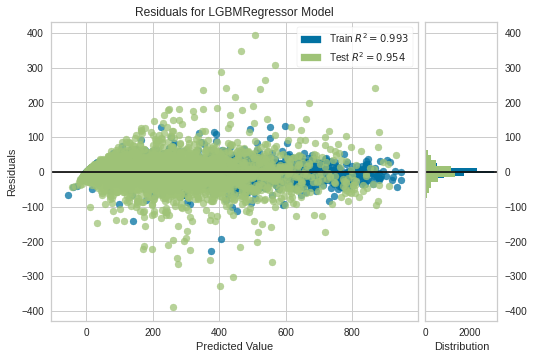

In [54]:
plot_model(tuned_lightgbm)

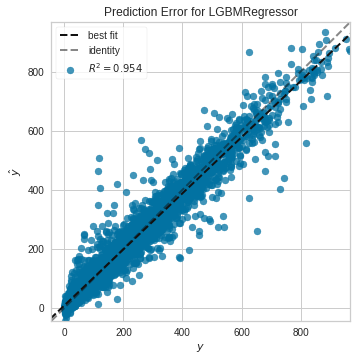

In [55]:
plot_model(tuned_lightgbm, plot = 'error')

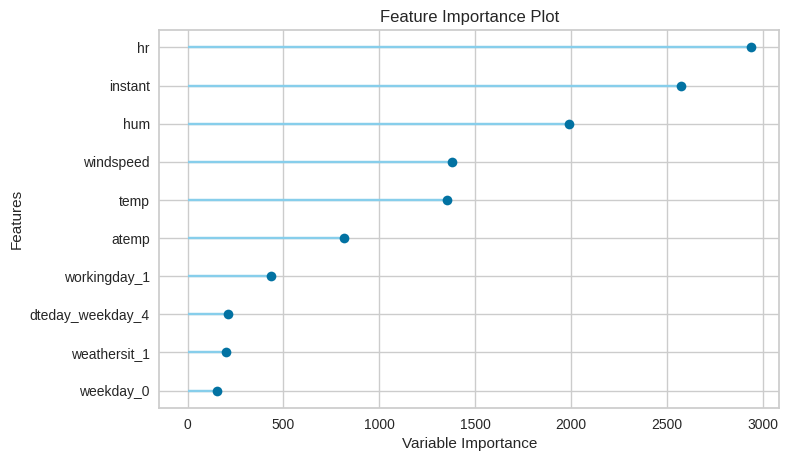

In [56]:
plot_model(tuned_lightgbm, plot='feature')

In [57]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
predict_model(tuned_lightgbm);

Model      MAE        MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  23.5442  1518.8271  ...  0.9539  0.3989  0.3821

[1 rows x 7 columns]

In [59]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [60]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
              random_state=790, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [61]:
predict_model(final_lightgbm);

Model      MAE       MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  12.1314  347.5518  ...  0.9895  0.2903  0.2431

[1 rows x 7 columns]

In [62]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

instant    dteday  season  yr  ...   hum  windspeed  cnt       Label
0        2  1/1/2011       1   0  ...  0.80     0.0000   40   22.467623
1        6  1/1/2011       1   0  ...  0.75     0.0896    1   -5.100959
2        9  1/1/2011       1   0  ...  0.75     0.0000    8   34.381415
3       13  1/1/2011       1   0  ...  0.77     0.2836   84  112.508741
4       19  1/1/2011       1   0  ...  0.88     0.2537   35   49.513446

[5 rows x 16 columns]

In [64]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.961

In [65]:
save_model(final_lightgbm,'Final LightGBM Model 10Dec2021')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.2, max_depth=110,
                                min_child_samples=20, min_child_weight=0.001,
                 

In [66]:
saved_final_lightgbm = load_model('Final LightGBM Model 10Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [67]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [68]:
new_prediction.head()

instant    dteday  season  yr  ...   hum  windspeed  cnt       Label
0        2  1/1/2011       1   0  ...  0.80     0.0000   40   22.467623
1        6  1/1/2011       1   0  ...  0.75     0.0896    1   -5.100959
2        9  1/1/2011       1   0  ...  0.75     0.0000    8   34.381415
3       13  1/1/2011       1   0  ...  0.77     0.2836   84  112.508741
4       19  1/1/2011       1   0  ...  0.88     0.2537   35   49.513446

[5 rows x 16 columns]

In [70]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')


0.961